<a href="https://colab.research.google.com/github/jjAguil/Tareas-Simulacion/blob/main/Numpy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Numpy
En Python, para importar una librería utilizamos el comando `import`, por
ejemplo
``` python
import numpy
```

Además, podemos darle un *alias* a nuestra librería, lo cual es conveniente pues
en la mayoría de casos, nos ahorra tener que escribir completo el nombre de la
librería cada vez que queramos hacer uso de ella. Para ello, la sintáxis es:
`import modulo as alias`.

```python
# import sin alias
import numpy

a = numpy.array([1, 2, 3, 4])  # debemos escribir numpy completo

# import con alias
import numpy as np
a = np.array([1, 2, 3, 4])
```

Puede parecer una cosa simple, sin embargo, es demasiado útil cuando se tiene
que escribir el alias (o la librería) muchas veces en el código.

**Nota**: por convención, el alias que se le da a `numpy` es `np`.

In [ ]:
import numpy as np

## ndarray
Es un contenedor multidimensional, de tamaño fijo. Contiene elementos del mismo
tipo de dato y tamaño.
Entre los *atributos* de los arreglos tenemos:
- `shape`: es una tupla de enteros **no negativos**
`(dimension_1, dimension_2, dimension_3, ...)`. El
número de elementos en la tupla es el número de dimensiones del arreglo; el
valor de cada elemento indica cuántos items tiene el arreglo en dicha dimensión.
- `dtype`: el tipo de datos que contiene el arreglo.

Al contenido de los arreglos, al igual que otras colecciones de Python, se puede
acceder mediante índices o `slices` (más adelante hablaremos de esto); además
de a través de los métodos y atributos propios del arreglo.

Al ser un tipo de estructura de datos *compleja*, una variable guarda en
realidad la referencia al bloque de memoria donde inicia el arreglo. Por lo
tanto, si dos variables *apuntan* al mismo arreglo, los cambios en una se verán
reflejados en la otra. En *jerga* de numpy, se dice que un arreglo es una
`view` de otro.

``` python
a = np.array([1, 2, 3, 4, 5])  # arreglo base
b = a  # b es una view de a. Misma dirección en memoria, mismos datos.
```

## ¿Cómo declarar un arreglo?
Existen diversos métodos para crear un array, a partir de datos ya existentes o
mediante el uso de una función de numpy que genere el array y los datos.

A partir de datos ya existentes, mediante el método  `np.array()` que acepta
a la entrada, entre otras cosas, los datos que convertirá a arreglos.

In [ ]:
a = [1, 2, 3, 4, 5]  # lista
a_arr = np.array(a)
print(a, type(a))
print(a_arr, type(a_arr))

b = (41, 42, 43, 44, 45)  # tupla
b_arr = np.array(b)
print()
print(b, type(b))
print(b_arr, type(b_arr))

[1, 2, 3, 4, 5] <class 'list'>
[1 2 3 4 5] <class 'numpy.ndarray'>

(41, 42, 43, 44, 45) <class 'tuple'>
[41 42 43 44 45] <class 'numpy.ndarray'>


Mediante métodos de `numpy`:

In [ ]:
# crea un arreglo desde 0 hasta n-1
n = 10
arr = np.arange(10)
print(f"arr: {arr}")
print()

# crea un arreglo con puntos equidistantes en un rango dado
n = 10
lin = np.linspace(0, 10, num=n)  # si incluye valor final
print(f"linspace: {lin}")
print()

# empty crea un array con datos "basura" de la shape especificada
empty = np.empty((10,), dtype='float32')
print(f"empty: {empty}")
print()

# zeros y ones crean arreglos con todos sus elementos en 0 o 1, segun el caso
zer = np.zeros((10,))
one = np.ones((10,))
print(f"zeros: {zer}")
print(f"ones: {one}")
print()

# eye crea un arreglo 2D (matriz) con 1s en la diagonal y 0s fuera de
id = np.eye(4)
print(f"identity with np.eye:\n{id}")
print()

# full crea un arreglo con la shape dada y lo llena con el valor indicado
full = np.full((10, 2, 5), 42)
print(f"full array:\n{full}")
print()

arr: [0 1 2 3 4 5 6 7 8 9]

linspace: [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]

empty: [-1.7651071e+26  3.1394691e-41  0.0000000e+00  0.0000000e+00
  3.1953495e+21  1.0311172e-11  6.7941716e-07  1.0373975e-08
  6.7262326e-44  0.0000000e+00]

zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ones: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

identity with np.eye:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

full array:
[[[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]

 [[42 42 42 42 42]
  [42 42 42 42 42]]]



## Copiar arreglos
Para copiar un arreglo, debemos usar el método `np.copy()`, en lugar del
operador de asignación.

In [ ]:
# haciendo uso del operador de asignacion
a = np.array([1, 2, 3, 4, 5, 6])
b = a  # b es una view de a, comparten informacion

print(f"a antes de modificación: {a}")
print(f"b antes de modificación: {b}")
b[0] = 42
print(f"a despues de modificación: {a}")
print(f"b despues de modificación: {b}")

print()
print(f"Checar si a y b son referencias al mismo array: {a is b}")

a antes de modificación: [1 2 3 4 5 6]
b antes de modificación: [1 2 3 4 5 6]
a despues de modificación: [42  2  3  4  5  6]
b despues de modificación: [42  2  3  4  5  6]

Checar si a y b son referencias al mismo array: True


In [ ]:
c = np.copy(a)
print(f"a antes de modificación: {a}")
print(f"c antes de modificación: {c}")
c[0] = 21
c[-1] = 42
c[2] = 84
print(f"a despues de modificación: {a}")
print(f"c despues de modificación: {c}")
print()
print(f"Checar si a y c son referencias al mismo array: {a is c}")

a antes de modificación: [42  2  3  4  5  6]
c antes de modificación: [42  2  3  4  5  6]
a despues de modificación: [42  2  3  4  5  6]
c despues de modificación: [21  2 84  4  5 42]

Checar si a y c son referencias al mismo array: False


## Dimensiones
En Numpy, las dimensiones se refiere al número de *axes* (ejes) que tiene un
arreglo multidimensional, en jerga de Numpy, el número de dimensiones es
conocido como `ndim`.

Un arreglo de dimensión cero se refiere a un solo número o elemento; los
arreglos unidimensionales son análogos a los vectores; los bidimensionales a las
matrices. Sin embargo, podemos tener muchas más dimensiones en arreglos de
numpy.


In [ ]:
# Crear  0D array
scalar = np.array(42)
print(f"Arreglo: {scalar}")
print(f"Dimensiones: {scalar.ndim}")
print(f"Shape: {scalar.shape}")


# Crear 1D array
arr_1d = np.array([1, 2, 3, 4, 5])
print()
print(f"Arreglo: {arr_1d}")
print(f"Dimensiones: {arr_1d.ndim}")
print(f"Shape: {arr_1d.shape}")

# Crear 2D array. Lista de listas
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print()
print(f"Arreglo:\n{arr_2d}")
print(f"Dimensiones: {arr_2d.ndim}")
print(f"Shape: {arr_2d.shape}")

# Crear 3D array. Lista de listas de listas
arr_3d = np.array([[[1, 2, 3],
                    [4, 5, 6]],
                   [[7, 8, 9],
                    [10, 11, 12]]])
print()
print(f"Arreglo:\n{arr_3d}")
print(f"Dimensiones: {arr_3d.ndim}")
print(f"Shape: {arr_3d.shape}")


# Crear 4D array
arr_4d = np.array([[[[1, 2], [3, 4]],
                    [[5, 6], [7, 8]]],
                   [[[9, 10], [11, 12]],
                    [[13, 14], [15, 16]]]])
print()
print(f"Arreglo:\n{arr_4d}")
print(f"Dimensiones: {arr_4d.ndim}")
print(f"Shape: {arr_4d.shape}")


Arreglo: 42
Dimensiones: 0
Shape: ()

Arreglo: [1 2 3 4 5]
Dimensiones: 1
Shape: (5,)

Arreglo:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Dimensiones: 2
Shape: (3, 3)

Arreglo:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Dimensiones: 3
Shape: (2, 2, 3)

Arreglo:
[[[[ 1  2]
   [ 3  4]]

  [[ 5  6]
   [ 7  8]]]


 [[[ 9 10]
   [11 12]]

  [[13 14]
   [15 16]]]]
Dimensiones: 4
Shape: (2, 2, 2, 2)


# Indices y Slices
En Numpy, podemos acceder a los elementos de los arreglos mediante índices o slices, que son técnicas que nos permiten acceder y manipular elementos
específicos o un subconjunto de elementos del arreglo.

Como ya vimos, los arreglos pueden tener multiples dimensiones: 1D, 2D, 3D,
etc. Con índices y slices podemos acceder a diferentes bloques de datos

In [ ]:
# Crear 1D array
arr = np.array([10, 20, 30, 40, 50])

# Acceder a elementos individuales del arreglo
print(arr[0])  # Output: 10
print()
print(arr[3])  # Output: 40




10

40


In [ ]:
# Crear 1D array
arr = np.array([10, 20, 30, 40, 50])

# Slices
print(arr[1:4])   # Output: [20 30 40] (segundo a cuarto item)
print(arr[:3])    # Output: [10 20 30] (primero a tercer item)
print(arr[::2])   # Output: [10 30 50] (del primero al último, de dos en dos)
print(arr[::-1])  # Output: [50 40 30 20 10] (en orden reverso)


[20 30 40]
[10 20 30]
[10 30 50]
[50 40 30 20 10]


In [ ]:
# Crear 2D array
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Slices
print(arr[1, 2])      # Output: 6 (elemento en fila 1, columna 2)
print()
print(arr[:2, 1:])    # Output: [[2 3] [5 6]] (filas 0 y 1, columna 1 y 2)
print()
print(arr[:, 0])      # Output: [1 4 7] (todas las filas, columna 0)
print()
print(arr[::-1, ::-1]) # Output: [[9 8 7] [6 5 4] [3 2 1]] (todo al revés)
print()
print()
print()
print(arr[0])      # Output: [1 4 7] (todas las filas, columna 0)



6

[[2 3]
 [5 6]]

[1 4 7]

[[9 8 7]
 [6 5 4]
 [3 2 1]]



[1 2 3]


## Resizing
Cambiar el tamaño de un arreglo implica cambiar el número de elementos que
contiene; podemos incrementar o disminuir este número. Para ello, se utiliza
el método `np.resize()`. Adicionalmente, podemos acceder al atributo `shape` del
arreglo y cambiar su tamaño.

Al usar `resize`, se crea un nuevo arreglo con las dimensiones especificadas; si
el arreglo es de mayor tamaño que el original, se añadirán nuevos elementos, por
el contrario, si el arreglo es de menor tamaño, los elementos serán truncados.


In [ ]:
# Usando np.resize()
arr = np.array([1, 2, 3, 4, 5, 6])
resized_arr = np.resize(arr, (3, 4))
print(f"arreglo original:\n{arr}")
print(f"arreglo nuevo 1:\n{resized_arr}")  # se crean nuevos elementos


resized_arr = np.resize(arr, (2, 2))
print(f"arreglo nuevo_2:\n{resized_arr}")


arreglo original:
[1 2 3 4 5 6]
arreglo nuevo 1:
[[1 2 3 4]
 [5 6 1 2]
 [3 4 5 6]]
arreglo nuevo_2:
[[1 2]
 [3 4]]


In [ ]:
# usando el atributo shape
arr = np.array([1, 2, 3, 4, 5, 6])
arr.shape = (3, 2)
print(arr)

arr.shape = (2, 3)
print()
print(arr)

arr.shape = (6, 1)
print()
print(arr)

arr.shape = (1, 6)
print()
print(arr)

arr.shape = (6,)
print()
print(arr)

[[1 2]
 [3 4]
 [5 6]]

[[1 2 3]
 [4 5 6]]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

[[1 2 3 4 5 6]]

[1 2 3 4 5 6]


## Reshaping
Reshaping implica cambiar la forma (shape) de un arreglo, sin modificar el
número de elementos que contiene. Nos permite reacomodar cómo es que los
elementos se interpretan dentro del array, pero NO modifica los datos. Para
lograr esto, Numpy proveé el comando: `np.reshape()`.

**NOTA**: revisar la [documentación oficial de Numpy](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [ ]:
# Reshaping usando np.reshape()
arr = np.array([1, 2, 3, 4, 5, 6])
reshaped_arr = arr.reshape((3, 2))
print(arr)
print(reshaped_arr)


reshaped_arr = arr.reshape((2, 3))
print()
print(reshaped_arr)

"""
Si en una tupla de shape, pasamos el valor -1, Numpy inferirá, de acuerdo a los
otros valores de la tupla, qué valor corresponde a ese eje.

En este ejemplo, Numpy sabe que la shape final será (2, 3)
"""
reshaped_arr = arr.reshape((2, -1))
print()
print(reshaped_arr)

arr = np.arange(9)
print(arr)
arr_ = arr.reshape((3, -1))


[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]

[[1 2 3]
 [4 5 6]]

[[1 2 3]
 [4 5 6]]
[0 1 2 3 4 5 6 7 8]


## Stacking
Se refiere a la combinación de multiples arreglos en uno solo, que sea la
concatenación de ambos; dicha concatenación se hace con respecto al `axis` (eje)
especificado. Para relazis el `stacking` (apilamiento) de arreglos, Numpy nos
proporciona dos opciones: `np.vstack()` y `np.hstack()`.

### `np.vstack()` (Vertical Stacking):
La función `np.vstack()` apila arreglos de manera vertical; es decir, apila los
arreglos en el eje de las filas (componente vertical). Para que esto pueda ser
posible, todos los arreglos deben de tener el mismo número de columnas (segundo
`axis` [eje])

###`numpy.hstack()` (Horizontal Stacking):
La función `np.hstack()` apila arreglos de manera horizontal; es decir,
concatena los arreglos a lo largo del eje de las columnas (componente
horizontal). Para poder apilar los arreglos horizontalmente, todos ellos deben
tener el mismo número de filas (primer `axis`)

In [ ]:
import numpy as np

arr_1 = np.array([[1, 2, 3],
                 [4, 5, 6]])

arr_2 = np.array([[7, 8, 9],
                 [10, 11, 12]])

# arr_1 = np.ones((3, 2, 3))
# arr_2 = np.ones((3, 2, 3)) * 42
# Vertical stacking
stacked_vertical = np.vstack((arr_1, arr_2))
stacked_horizontal = np.hstack((arr_1, arr_2))
print(f"arr_1:\n{arr_1}")
print()
print(f"arr_2:\n{arr_2}")
print()
print(f"stacked_vertical:\n{stacked_vertical}")
print()
print(f"stacked_horizontal:\n{stacked_horizontal}")

# también aplica para mayores dimensiones
arr_1 = np.ones((3, 2, 3))
arr_2 = np.ones((3, 2, 3)) * 42
# Vertical stacking
stacked_vertical = np.vstack((arr_1, arr_2))
print("Stackin en 3D")
print(f"arr_1:\n{arr_1}")
print()
print(f"arr_2:\n{arr_2}")
print()
print(f"stacked_vertical:\n{stacked_vertical}")


arr_1:
[[1 2 3]
 [4 5 6]]

arr_2:
[[ 7  8  9]
 [10 11 12]]

stacked_vertical:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

stacked_horizontal:
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
Stackin en 3D
arr_1:
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]

arr_2:
[[[42. 42. 42.]
  [42. 42. 42.]]

 [[42. 42. 42.]
  [42. 42. 42.]]

 [[42. 42. 42.]
  [42. 42. 42.]]]

stacked_vertical:
[[[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[42. 42. 42.]
  [42. 42. 42.]]

 [[42. 42. 42.]
  [42. 42. 42.]]

 [[42. 42. 42.]
  [42. 42. 42.]]]


## Axes
En Numpy, los ejes (`axes`) se refieren al número de dimensiones en las que está
organizado el array. Es importante entender cómo funcionan los ejes, y cómo son
interpretados y operados por Numpy, para poder aplicar las funciones
correctamente, por ejemplo: la función `np.mean()`, que calcula la media de los
valores proporcionados.


In [ ]:
import numpy as np

array = np.array([[1, 2, 3],
                  [4, 5, 6]])


# Calcular la media del arreglo completo
mean_of_array = np.mean(array)

# Calcula la media actuando sobre el eje 0; media de todas las columnas
mean_along_axis_0 = np.mean(array, axis=0)

# Calcula la media actuando sobre el eje 1; media de todas las filas
mean_along_axis_1 = np.mean(array, axis=1)

print(array)
print(mean_of_array)
print(mean_along_axis_0)
print(mean_along_axis_1)


[[1 2 3]
 [4 5 6]]
3.5
[2.5 3.5 4.5]
[2. 5.]


El eje especificado le indica a Numpy en qué dirección *avanzar* o actuar.
En el caso de funciones que entregan un arreglo de menores dimensiones, como
`np.mean()`, podemos interpretar el eje como aquél que vamos a *comprimir*

Esta idea también se extrapola a arreglos de mayores dimensiones, veamos qué
pasa con un arreglo 3D:

In [ ]:
array_3d = np.array([[[1, 2, 3],
                      [4, 5, 6]],

                     [[7, 8, 9],
                      [10, 11, 12]]])

print(f"arreglo 3d:\n{array_3d}")
print(f"shape 3d: {array_3d.shape}")
print()

# Media de todo el arreglo
media_completa = np.mean(array_3d)
print(f"media_completa:\n{media_completa}")
print(f"shape media_completa: {media_completa.shape}")
print()

# media en el eje 0
media_eje_0 = np.mean(array_3d, axis=0)
print(f"media_eje_0:\n{media_eje_0}")
print(f"shape media_eje_0: {media_eje_0.shape}")
print()

# Calculating the mean along Axis 1 (mean for each row within a 2D array)
media_eje_1 = np.mean(array_3d, axis=1)
print(f"media_eje_1:\n{media_eje_1}")
print(f"shape media_eje_1: {media_eje_1.shape}")
print()

# Calculating the mean along Axis 2 (mean for each column within a 2D array)
media_eje_2 = np.mean(array_3d, axis=2)
print(f"media_eje_2:\n{media_eje_2}")
print(f"shape media_eje_2: {media_eje_2.shape}")
print()

arreglo 3d:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
shape 3d: (2, 2, 3)

media_completa:
6.5
shape media_completa: ()

media_eje_0:
[[4. 5. 6.]
 [7. 8. 9.]]
shape media_eje_0: (2, 3)

media_eje_1:
[[ 2.5  3.5  4.5]
 [ 8.5  9.5 10.5]]
shape media_eje_1: (2, 3)

media_eje_2:
[[ 2.  5.]
 [ 8. 11.]]
shape media_eje_2: (2, 2)



## Vectorization
Se refiere a la habilidad de Numpy para llevar a cabo operaciones en **arreglos
completos** en un solo paso, de manera eficiente; elimina la necesidad de
*loops*.

La vectorización de Numpy utiliza, debajo del agua, código optimizado en *C* y
*Fortran*. Las principales ventajas de usar vectorización son:
1. Performance: las operaciones vectorizadas están optimizadas y se ejecutan en
un nivel más bajo, por lo que se optimiza el procesamiento y el uso de memoria.
Esto se traduce en menores tiempos de ejecución, lo cuál se vuelve más evidente
conforme incrementa el tamaño de los arreglos.

2. Código mas conciso y legible: al eliminar los ciclos *for*, el código se
vuelve más corto y más cercano a la notación matemática. Menos oportunidad de
error a la hora de programar.

3. *Broadcasting*: permite operaciones entre arreglos de diferentes tamaños sin
la necesidad de manualmente hacer *resize* o *reshape*.

In [ ]:
import time
reps = 5000
a = np.ones((100, 100), dtype=int)

a[:-10, 23:] *= 4
a[24:30, 24:-34] *= 42
a[50:, :-23] *= -42
a[24:-2, 13:-13] *= -12


start_filas = time.perf_counter()
for _ in range(reps):
    sum_filas = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            sum_filas += a[i, j]
end_filas = time.perf_counter()


start_cols = time.perf_counter()
for _ in range(reps):
    sum_cols = 0
    for j in range(a.shape[1]):
        for i in range(a.shape[0]):
            sum_cols += a[i, j]
end_cols = time.perf_counter()

start_vect = time.perf_counter()
for _ in range(reps):
    sum_vect = np.sum(a)
end_vect = time.perf_counter()

print(f"suma filas: {sum_filas}, tiempo: {end_filas - start_filas:.4f}")
print(f"suma cols: {sum_cols}, tiempo: {end_cols - start_cols:.4f}")
print(f"suma vectorizada: {sum_vect}, tiempo: {end_vect - start_vect:.4f}")

suma filas: 4194308, tiempo: 15.9710
suma cols: 4194308, tiempo: 17.1750
suma vectorizada: 4194308, tiempo: 0.0314


In [ ]:
mask = a > 0
print(mask)
print(f"shape of a: {a.shape}")
print(f"shape of a_mask: {a[mask].shape}")
print(np.sum(a[mask]))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
shape of a: (100, 100)
shape of a_mask: (6818,)
4826072


# Visualizaciones con Seaborn
Seaborns es una librería de visualización de datos para Python, la cual está
desarrollada tomando como cimiento Matplotlib. Proporciona una interfaz de alto
nivel para crear gráficas estéticamente atractivas, sin descuidar la parte
informativa.

Además, Seaborn facilita el proceso de creación de gráficas, mientras
proporciona diferentes temas, así como esquemas de colores, por default para
las visualizaciones.

Para importar Seaborn en colab, se requiere hacer el siguiente *import*:
```python
import seaborn as sns
```

Por otro lado, para escoger un tema de seaborn para todas nuestras gráficas,
utilizamos el siguiente comando dentro de nuestro código:

```python
sns.set(style="whitegrid")
```
las opciones de tema son:
- darkgrid
- whitegrid
- dark
- white
- ticks
para más información siempre puedes revisar la [documentación](https://seaborn.pydata.org/generated/seaborn.set_style.html)

La gráfica más simple que podemos crear con seaborn es una gráfica de línea,
para ello, podemos graficar algún polinomio:

<ipython-input-24-24964aaae541>:17: RuntimeWarning: invalid value encountered in sqrt
  sns.lineplot(x=x, y=y ** 0.5, linewidth=4.5,


Text(0.5, 1.0, 'Plot of y = x^2')

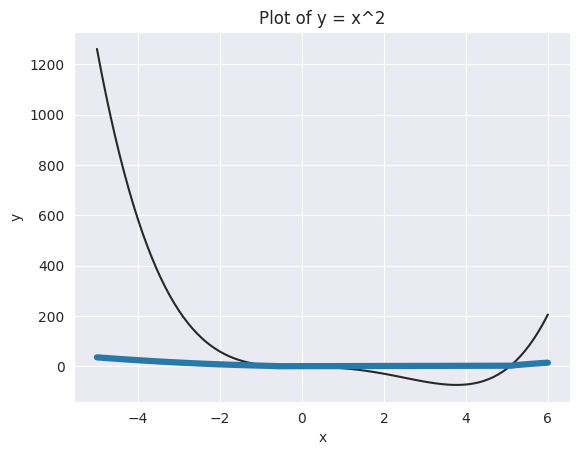

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# seleccionar tema
sns.set_style('darkgrid')  # darkgrid, whitegrid, dark, white, ticks

# Crear arreglo
x = np.linspace(-5, 6, 100)
#x = np.arange(-5, 7)
y = x**4 - 5 * x**3 + 0.1 * x**2 - 2 * x - 2

# Crear gráfica de líne con seaborn
sns.lineplot(x=x, y=y, linewidth=1.5,
             # color='orange')
             color='#282828')
sns.lineplot(x=x, y=y ** 0.5, linewidth=4.5,
             color='#2878a8')

# Agregar etiquetas a los ejes y título
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^2")

También podemos crear gráficas de funciones trigonométricas, por ejemplo:


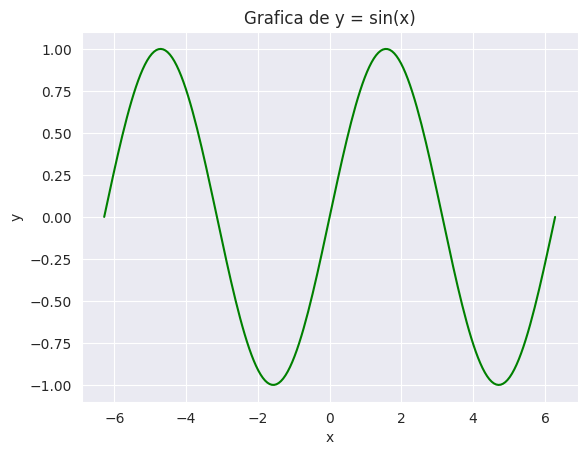

In [ ]:
# Generar datos
x = np.linspace(-2 * np.pi, 2*np.pi, 200)
y = np.sin(x)

# Crear la gráfica
sns.lineplot(x=x, y=y, color='green')

# Agregar etiquetas a los ejes y título
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica de y = sin(x)")

# Mostrar la gráfica
plt.show()


# Ejercicios
- Crea un arreglo 1D con números del 1 al 50
- Obten un nuevo arreglo en el cual están elevados todos los valores del punto
    anterior al cuadrado


- Crea un arreglo 1D que contenga 100 puntos equidistantes en el rango
$[-5, 5]$
- Aplica las siguientes funciones trigonométricas al arreglo:
    - [sin](https://numpy.org/doc/stable/reference/generated/numpy.sin.html)
    - [cos](https://numpy.org/doc/stable/reference/generated/numpy.cos.html#numpy.cos)
    - [tan](https://numpy.org/doc/stable/reference/generated/numpy.tan.html)
    - [tanh](https://numpy.org/doc/stable/reference/generated/numpy.tanh.html)
- Visualiza todas las funciones en una sola gráfica de líneas

In [ ]:
# crear arreglo x: np.linspace o np.arange

# crear arreglos que guardan los valores de cada una de las funciones
# sin = np.sin(x)

# crear grafica para cada una de las funciones trigonometricas
sns.lineplot(x=, y=)

## Operaciones básicas de Numpy

### Ejercicio 1
- Crea un array con valores en el rango $[1, 18]$ (ambos incluídos);
incrementos de uno en uno
- Calcula la [media/promedio](https://numpy.org/doc/stable/reference/generated/numpy.mean.html),
[mediana](https://numpy.org/doc/stable/reference/generated/numpy.median.html),
y [desviación estándar](https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std) del arreglo


### Ejercicio 2
- Haz un reshape del arreglo anterior, su nueva forma debe ser (2, 9), es decir, una matriz o arreglo bidimensional
- Guarda en un nuevo arreglo, el resultado de multiplicar las columnas 0, 2, 4,
y 6. ¿Cuál es la forma del arreglo resultante?
- Calcula la media, mediana y std del nuevo arreglo, actuando sobre cada uno de
sus ejes. Ejemplo: `axis=0`
- Guarda en arreglos separados cada una de las filas de la matriz
- crea un nuevo arreglo de shape (1, 9). Súmalo a la primera fila del arreglo
original, a la segunda fila agrega el nuevo arreglo multiplicado por dos.
- crea un nuevo arreglo de shape (2, 3) y multiplicalo por las primeras tres
columnas del arreglo original
- crea un nuevo arreglo de shape (1, 9) y súmalo a todo el arreglo inicial


### Ejercicio 3
- Haz un reshape del arreglo anterior, su nueva forma debe ser (3, 2, 6), es decir, un
arreglo tridimensional
- Calcula la media, mediana y std del nuevo arreglo, actuando sobre cada uno de
sus ejes. Ejemplo: `axis=0`, recuerda que ahora son 3 ejes


### Ejercicio 4
- Crea un arreglo de $3 \times 3$ con enteros aleatorios con valores entre 1 y 10. Pista: [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)
- Crea un nuevo arreglo (copia, `np.copy`) con la primera fila multiplicada por
dos, la segunda por 3 y la última por 4
- Suma los dos arreglos en un nuevo arreglo
- Suma 5 a todo el arreglo

In [ ]:
# TODO